In [0]:
# IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import SGD

In [0]:
# DATA PREPROCESSING AND CLEANING 
training_set = pd.read_csv('reliance.csv')
training_set = training_set.iloc[:,1:2].values      #open prices
len(training_set)       #2D array 
training_set = training_set[~np.isnan(training_set)]
new_training_set = [[i] for i in training_set]      #converting back to 2D array
new_training_set = np.array(new_training_set) 
len(new_training_set)       #1D array

310348

[]

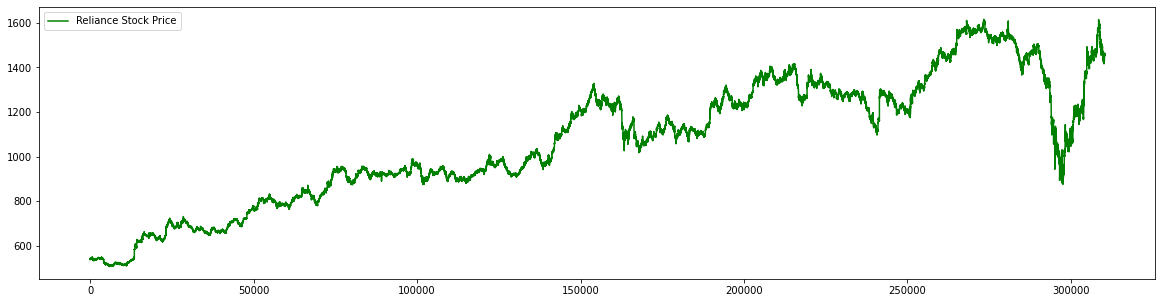

In [0]:
plt.figure(figsize=(20,5))
plt.plot(new_training_set,color="green",label="Reliance Stock Price")
plt.legend()
plt.plot()

In [0]:
# FEATURE SCALING 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_training_set = sc.fit_transform(new_training_set)

In [0]:
# CREATING INPUT DATA STREAM
x_train = new_training_set[:]
x_new_train=[]
y_train=[]
for i in range(0,10000):
    x_new_train.append([x_train[i:i+100]])
    y_train.append(x_train[i+100])


x_train = np.reshape(x_new_train,(10000,100,1))
y_train = np.array(y_train)

In [0]:
# BUILDING THE MODEL
model = Sequential()

model.add(LSTM(1000,input_shape=(100,1),return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Dense(1))

In [0]:
# COMPILING MODEL 
model.compile(optimizer="adam",loss="mean_squared_error")

In [0]:
# STRUCTURE OF THE MODEL
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 100, 1000)         4008000   
_________________________________________________________________
lstm_14 (LSTM)               (None, 100)               440400    
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               12928     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 4,461,457
Trainable params: 4,461,457
Non-trainable params: 0
_________________________________________________________________


In [0]:
# TRAINING THE MODEL ON THE TRAINING SET
model.fit(x_train,y_train,batch_size=128,epochs=100)

Epoch 1/100
10000/10000 [==============================] - 28s 3ms/step - loss: 1.0453e-04
Epoch 2/100
10000/10000 [==============================] - 27s 3ms/step - loss: 1.2094e-06
Epoch 3/100
10000/10000 [==============================] - 27s 3ms/step - loss: 9.7481e-07
Epoch 4/100
10000/10000 [==============================] - 27s 3ms/step - loss: 1.1421e-06
Epoch 5/100
10000/10000 [==============================] - 27s 3ms/step - loss: 9.4997e-07
Epoch 6/100
10000/10000 [==============================] - 27s 3ms/step - loss: 8.8849e-07
Epoch 7/100
10000/10000 [==============================] - 27s 3ms/step - loss: 8.7510e-07
Epoch 8/100
10000/10000 [==============================] - 27s 3ms/step - loss: 8.9993e-07
Epoch 9/100
10000/10000 [==============================] - 27s 3ms/step - loss: 8.2941e-07
Epoch 10/100
10000/10000 [==============================] - 27s 3ms/step - loss: 8.8494e-07
Epoch 11/100
10000/10000 [==============================] - 27s 3ms/step - loss: 1.1083e-

In [0]:
# SAVING THE MODEL
model.save("model.h5")

# ***PREDICTION***

In [0]:
# IMPORTING LIBRARIES
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import load_model
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

In [0]:
# LOADING SAVED MODEL
model = load_model("model.h5")

In [0]:
# DATA PREPROCESSING AND CLEANING
test_set = pd.read_csv('reliance.csv')
test_set = test_set.iloc[:,1:2].values #open prices
len(test_set)
test_set #2D array 
test_set = test_set[~np.isnan(test_set)]
test_set #1D array
len(test_set)
new_test_set = [[i] for i in test_set] #converting back to 2D array
new_test_set = np.array(new_test_set) 
len(new_test_set)

310348

In [0]:
# RETRIEVING REAL VALUES FROM TABLE 
real = []
for i in range(0,309300):
    real.append(new_test_set[i+100])
    

real = np.array(real)
len(real)

309300

In [0]:
# NORMALIZATION
sc = MinMaxScaler()
new_test_set = sc.fit_transform(new_test_set)

In [0]:
# CREATING INPUT STREAM OF DATA 
x_train = new_test_set[:]
x_test=[]
y_test=[]
for i in range(10000,309300):
    x_test.append([x_train[i:i+100]])
    y_test.append(x_train[i+100])

x_test=np.reshape(x_test,(299300,100,1))
y_test=np.array(y_test)

In [0]:
# PREDICTION 
pred = model.predict(x_test)

In [0]:
# GETTING INVERSE TRANSFORMED VALUES OF PREDICTIONS 
pred = sc.inverse_transform(pred)
y_test_ = sc.inverse_transform(y_test)

In [0]:
pred
for i in range(10000):
    pred = np.insert(pred,0,[math.nan])

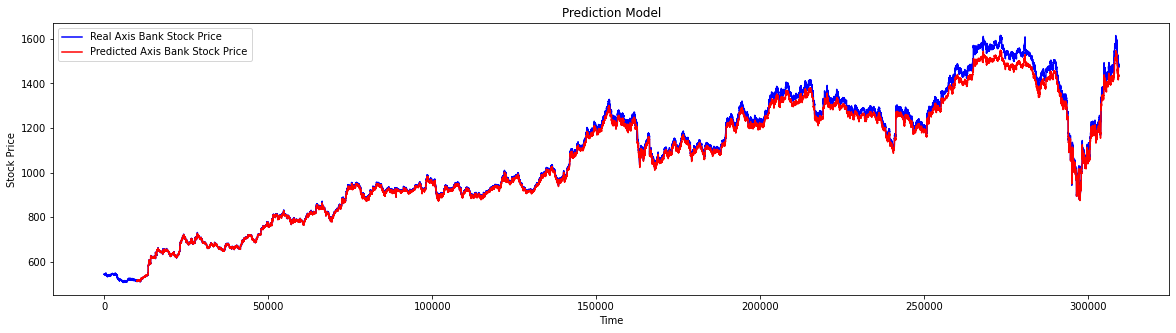

In [0]:
# VISUALIZATION OF PREDICTIONS VS REAL DATA
plt.figure(figsize=(20,5))
plt.plot(real,color="blue",label="Real Axis Bank Stock Price")
plt.plot(pred,color="red",label="Predicted Axis Bank Stock Price")
plt.title("Prediction Model")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()    
plt.show()